# Dash Workshop: Dash Tutorial 

## Ensure you have the latest version of Dash 

Open up Anaconda Prompt and type in `pip install --upgrade dash`.

Within jupyter notebook, use `print(dash.__version__)` to see the version you have. 

## Initializing and running the app

Initialize the dash app with

```Python
app = dash.Dash()
```

To run the app, call `app.run_server()` and pass `debug = False` as one of the arguments. **Be sure to specify your OWN port number** as an argument as well. 

```Python 
app.run_server(debug = False, port = xxxx)
```

## Troubleshooting and Debugging 

If your code is raising errors, make sure that letters are capitalized when needed. For example, `dcc.div()` won't work, but `dcc.Div()` will. Also check for commas, parentheses, and brackets.

Make sure that `debug` is set to `False` in `app.run_server`!

If you run your code and you receive the following output without any link going to your app

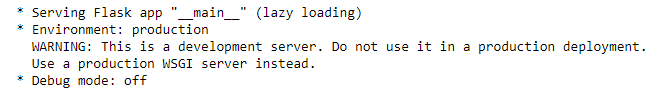

restart your kernel and try running the code again. That should do the trick and you should see something like this:

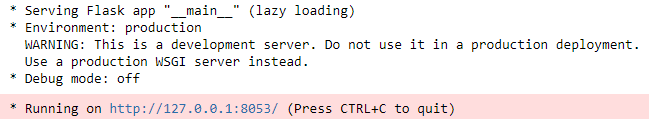

# Overview

An app made with the Dash module consists of a **layout** and **reactivity**. We'll begin with the app layout.

## Layout

Begin by importing the following modules. Every feature of our app will likely depend on each of these modules and libraries.

```Python
import dash 
from dash.dependencies import Input, Output, State
from dash import no_update
import dash_html_components as html 
import dash_core_components as dcc 
import dash_table
import plotly
import plotly.graph_objects as go
import pandas as pd
```

### Dash HTML Components

#### html.Div() Definition

`html.Div()` is essentially a container. Its primary use is to help style different parts of your app, as well as to make your code easier to understand. It's also possible to add reactivity to a `html.Div()` object, but we'll look at that later.

#### html.Div() Example

The below examples demonstrate how `html.Div()` objects are used to style the contents within the container. 

In [ ]:
import dash 
from dash.dependencies import Input, Output, State
from dash import no_update
import dash_html_components as html 
import dash_core_components as dcc 
import dash_table
import plotly
import plotly.graph_objects as go
import pandas as pd

In [ ]:
app = dash.Dash()

app.layout = html.Div([
    
        html.Div(
            'This text will be formatted in one style', 
            style={'color': 'blue', 'fontSize': 14}
        ),
    
        html.Div(
            'This text will be formatted in a different style', 
            style={'color': 'black', 'fontSize': 28}
        )
    
    ])

app.run_server(debug = False, port = 8053)


In the next example, we add a `style` property to the 'parent' `html.Div` container. Since the 'children' `html.Div` objects are located within this container, the `style` will be applied to both of them. 

Note that the `style` property is a *dictionary*. Many properties in the Dash 'language' are specified with dictionaries, so make sure you are understand how they work. 

In [ ]:
app = dash.Dash()

app.layout = html.Div([
    
        html.Div(
            'This text will be formatted in one style', 
            style={'color': 'blue', 'fontSize': 14}
        ),
    
        html.Div(
            'This text will be formatted in a different style', 
            style={'color': 'black', 'fontSize': 28}
        )
    
    ], 
    
    style={'marginTop': 100, 'backgroundColor': 'green'} 
        # style will be applied to the outermost `html.Div()` container 
    
)

app.run_server(debug = False, port = 8053)

#### Where to declare variables in your code, explicit vs implicit calls

##### Where to declare variables in your code

To extend the previous example, imagine we wanted to assign the strings to two variables and call those within our app. We need to do this **before** we begin defining the `app.layout`. 

The code below will **not** run because our new variables `string1` and `string2` are trying to be assigned within a `html.Div()` object. 

In [ ]:
# code will throw syntax error

app = dash.Dash()

app.layout = html.Div([
    
        string1 = 'This text will be formatted in one style',
        string2 = 'This text will be formatted in a different style',
        
        html.Div(
            string1, 
            style={'color': 'blue', 'fontSize': 14}
        ),
    
        html.Div(
            string2, 
            style={'color': 'black', 'fontSize': 28}
        )
    
    ])

app.run_server(debug = False, port = 8053)

The below code will function properly since we assign `string1` and `string2` before `app.layout`. Note that these variables can be defined before or after we initialize the app with `app = dash.Dash()`. In my opinion, though, it's good practice to define all variables and functions *before* calling `app = dash.Dash()`.

In [ ]:
# variables correctly assigned before calling `app.layout`

string1 = 'This text will be formatted in one style'
string2 = 'This text will be formatted in a different style'
lst = [string1, string2]

app = dash.Dash()

app.layout = html.Div([
    
        html.Div(
            children = [string1, string2],
            style={'color': 'blue', 'fontSize': 14}
        )
])

app.run_server(debug = False, port = 8053)

##### Calling `children` and `id`: explicit vs implicit calls

So far, we have been calling the `children` argument of `html.Div()` implicitly. This argument can be called both **implicitly** and **explicitly**. 

In [ ]:
# adding `children` in our code won't change anything to the resulting dashboard, 
# because even when we omitted it before, we were still calling it implicity

string1 = 'This text will be formatted in one style'
string2 = 'This text will be formatted in a different style'

app = dash.Dash()

app.layout = html.Div(children = [
    
        html.Div(
            children = string1, 
            style={'color': 'blue', 'fontSize': 14}
        ),
    
        html.Div(
            children = string2, 
            style={'color': 'black', 'fontSize': 28}
        )
    
    ])

app.run_server(debug = False, port = 8053)

If we want *all* the contents of an `html.Div()` object to be reactive and change with user input, then we will need give an id by passing `id = any_name_here`.

If you decide to pass `id = ` into your `html.Div()` object, then **`id` must be explicitly called.** The code will break otherwise. 

In [ ]:
# adding `id` to our code won't change anything either, because it's an optional argument to pass into html.Div()
# (HOWEVER, adding `id` becomes important when we want the contents of html.Div() to respond to user input)

string1 = 'This text will be formatted in one style'
string2 = 'This text will be formatted in a different style'

app = dash.Dash()

app.layout = html.Div(id = 'parent', children = [ # explicit id call
    
        html.Div(
            id = 'child 1', # explicit id call
            children = string1, 
            style={'color': 'blue', 'fontSize': 14}
        ),
    
        html.Div(
            id = 'child 2', # explicit id call
            children = string2, 
            style={'color': 'black', 'fontSize': 28}
        )
    
    ])

app.run_server(debug = False, port = 8053)

In [ ]:
# code won't run if we try to implicitly call `id`

string1 = 'This text will be formatted in one style'
string2 = 'This text will be formatted in a different style'

app = dash.Dash()

app.layout = html.Div(id = 'parent', children = [
    
        html.Div(
            'child 1', # implicit id call 
            children = string1, 
            style={'color': 'blue', 'fontSize': 14}
        ),
    
        html.Div(
            'child 2', # implicit id call 
            children = string2, 
            style={'color': 'black', 'fontSize': 28}
        )
    
    ])

app.run_server(debug = False, port = 8053)

### Dash Core Components: Adding Features to the Dashboard

#### Overview

Core components are the features of the dashboard. These are the things the user could interact with. Think dropdowns, graphs, buttons, sliders, filters, etc. A list of all the currently available core components can be found here: [Dash Core Components](https://dash.plot.ly/dash-core-components).

All core components will begin with `dcc.name_of_dropdown_here()`. The arguments passed inside will define the component, which are sometimes called **properties**. Since our app will have several components, they all will be contained in a parent `html.Div()` container.

#### Example: `dcc.Dropdown()`

In [ ]:
app = dash.Dash()

app.layout = html.Div([
    
    "Here is a dropdown. Ain't it purty?",
    
    dcc.Dropdown(
        options=[
            {'label': 'Dr. Rappa', 'value': 'MR'}, # notice that the label is what the user sees, not the value
            {'label': 'Mannyy', 'value': 'MD'},
            {'label': 'Urmila', 'value': 'USP'}
        ], 
        multi = True,
        placeholder = 'choose a name'
    )
    
])

app.run_server(debug = False, port = 8053)

(Tehcnically, a `html.Div()` isn't needed if our app only contains one component.)

In [ ]:
# notice that if our app only contains one component, we don't need a html.Div() container

app = dash.Dash()

app.layout = dcc.Dropdown(
    options=[
        {'label': 'New York City', 'value': 'NYC'},
        {'label': 'Montréal', 'value': 'MTL'},
        {'label': 'San Francisco', 'value': 'SF'}
    ],
    value='MTL'
    )  

app.run_server(debug = False, port = 8053)


Let's add another dropdown and explore other properties. We can use the `help()` function to view the documentation inside a cell.

In [ ]:
help(dcc.Dropdown())

Let's add another dropdown and add the `multi` property so that the user can specify multiple inputs.

In [ ]:
app = dash.Dash()

app.layout = html.Div([
    
    "Here is a dropdown. Ain't it purty?",
    
    dcc.Dropdown(id = 'dropdown_1',
        options=[
            {'label': 'Dr. Rappa', 'value': 'MR'}, 
            {'label': 'Mannyy', 'value': 'MD'},
            {'label': 'Urmila', 'value': 'USP'}
        ],
        value='MD' # specifies the default value when the app is launched
    ),
    
    "Here is another dropdown.",
    
    dcc.Dropdown(id = 'dropdown_2',
        options = [
            {'label': num, 'value': num} for num in range(0, 10, 2) # define labels and values with list comp
        ],
        value = None,
        multi = True,
    )
    
])

app.run_server(debug = False, port = 8053)

#### Practice problem: `dcc.Dropdown()`

Make an app that has a dropdown with the list of first and last names that are provided below. Use the last names as the labels and the first names as the values. (Hint: the `split` function might be useful for solving this problem). 

Design the app such that the following placeholder is displayed in the search bar: `'Search here to view the Project Asurion team roster.'`(Hint: use `help(dcc.Dropdown())` to figure out what property you need to specify)

```Python
names = ['Lu Woo', 'Urmila Paddle', 'Mannyy Daramoli', 'Kevin Lybranflakes', 'Ryan Weezer']
```

In [ ]:
names = ['Lu Woo', 'Urmila Paddle', 'Mannyy Daramoli', 'Kevin Lybranflakes', 'Ryan Weezer']

split_names = [name.split(' ') for name in names]

app = dash.Dash()

app.layout = html.Div(
    
    dcc.Dropdown(
        options = [{'label': name[1], 'value': name[0]} for name in split_names],
        placeholder = 'Search here to view the Project Asurion team roster.'
    )
)

app.run_server(debug = False, port = 8053)

#### Example: `dcc.Graph()`

Use the Plotly module to make interactive graphs in Dash. Other approaches may work, but I've found using Plotly to be the most straightforward. I recommend making and assigning the graph to a variable before calling it in your app. 


[List of all graphs with Plotly](https://plot.ly/python/?_ga=2.111287309.863351121.1583771864-1888264854.1583346242)


[Dash: Graph Examples and Reference](https://dash.plot.ly/dash-core-components/graph)

In [ ]:
import math
import numpy as np

x = np.linspace(start = 0, stop = 25, num = 100)
y = [math.sin(num) for num in x]

fig = go.Figure(data = go.Scatter(x = x, y = y))

app = dash.Dash()

app.layout = html.Div(

    dcc.Graph(figure = fig)

)

app.run_server(debug = False, port = 8053)

#### Practice problem: `dcc.Graph()`

Make a horizontal bar chart using the following data:

```Python
values = [54, 95, 66, 80, 71]
labels = ['Race', 'LaBarr', 'Healey', 'Rappa', 'Villanes']
```

Hint: After defining and assigning your graph to a variable, use `fig.update_layout(yaxis={'type': 'category'}`

In [ ]:
import plotly.graph_objects as go

values = [54, 95, 66, 80, 71]
labels = ['Race', 'LaBarr', 'Healey', 'Rappa', 'Villanes']

fig = go.Figure(data = go.Bar(x = values, y = labels, orientation = 'h'))
fig.update_layout(yaxis = {'type': 'category'}, title = 'Bar Chart')

app = dash.Dash()

app.layout = html.Div(

    dcc.Graph(figure = fig)
    
)

app.run_server(debug = False, port = 8053)

## Reactivity

Let's make an app that allows the user to alter an observation's value.

In [ ]:
app = dash.Dash()

values = [54, 95, 66, 80, 71]
labels = ['Race', 'LaBarr', 'Healey', 'Rappa', 'Villanes']

fig = go.Figure(data = go.Bar(x = values, y = labels, orientation = 'h'))
fig.update_layout(yaxis = {'type': 'category'}, title = 'Bar Chart')

app.layout = html.Div([

    dcc.Input(id = 'input_value',
        placeholder = 'Input score to be added here',
        type = 'number', 
        value = 0
    ),
    
    dcc.Dropdown(id = 'name_dropdown',
        placeholder = 'Choose a professor whose score you want to modify',
        options = [{'label': name, 'value': name} for name in labels],
        value = ''
                
    ),
    
    dcc.Graph(id = 'bar_chart',
        figure = fig
    )
    
])

@app.callback(
     dash.dependencies.Output('bar_chart', 'figure'),
     [dash.dependencies.Input('input_value', 'value'),
      dash.dependencies.Input('name_dropdown', 'value')]
)

def update_graph(input_value, name_dropdown):
        
    data = {name : score for name, score in zip(labels, values)} # looping through two lists at once with zip()
        
    if input_value is not None:
        for key in data:
            if key == name_dropdown:
                data[key] = data[key] + input_value
                
    new_x = [data[key] for key in data]
        
    graph = go.Figure(data = go.Bar(x = new_x, y = labels, orientation = 'h'))
    
    return(graph)

app.run_server(debug = False, port = 8053)

In [ ]:
# here is how zip works if you are curious

values = [54, 95, 66, 80, 71]
labels = ['Race', 'LaBarr', 'Healey', 'Rappa', 'Villanes']

data = {name : score for name, score in zip(labels, values)}

print(data)

### Reactivity Practice Problems

Problem 1:
- Make a dashboard that plots a histogram of a normal distribution. The dashboard responds to three user inputs: average, standard deviation, and sample size. Use the following default values: 0 for the average, 1 for the standard deviation, and 100 for the sample size. (Hint: use `go.Histogram()` and `np.random.normal(mu, sigma, n)` to generate your x values)

Problem 2:
- Continuing with the previous `values` and `labels` data, make a dashboard that allows the user to display (via bar chart) the names whose score meets a minimum threshold (i.e., >60, >70, >80, etc.)